<center><h1><b>Waze User Churn Prediction</b></h1></center>

<div>
    <center><img src = "waze_logo_2020.webp" width = "700"></center>  
</div>

# **1. Project Overview**
Waze's free navigation app makes it easier for drivers around the world to get where they want to go. Waze's community of map editors, beta testers, translators, partners, and users helps make each drive better and safer. Waze partners with cities, transportation authorities, broadcasters, businesses, and first responders to help as many people as possible travel more efficiently and safely.

This project is part of a larger effort at Waze to increase growth. It aims to help prevent user churn on the app. Churn quantifies the number of users who have uninstalled the app or stopped using the app. This project focuses on monthly user churn.

Developing a churn prediction model will help prevent churn, improve user retention, and grow Waze's business. An accurate model can also help identify specific factors that contribute to churn and answer questions such as:
* Who are the users most likely to churn?
* Why do users churn?
* When do users churn?

This project will help Waze leadership optimize the company's retention strategy, enhance user experience, and make data-driven decisions about product development.

# **2. Project Workflow**
This project follows PACE framework. PACE stands for **Plan**, **Analyze**, **Construct** and **Execute**. The following notebook components are labeled with the respective PACE stage.

## **2.1. PACE: Plan**
In this stage, the project proposal is prepared, intended to communicate information about project tasks and milestones with the team. The project proposal includes the order of tasks, the relevant milestone for each task and the PACE stage(s) for each task.

## **2.2. PACE: Analyze**
This project uses a dataset called `waze_dataset.csv`. It contains synthetic data created for this project in partnership with Waze.

This stage consists of following tasks:
1. Perform exploratory data analysis (EDA)
2. Hypothesis Testing
3. Handle missing data and outliers
4. Feature Engineering

### **2.2.1. Exploratory Data Analysis (EDA)**

#### **Descriptive Statistics**

In [4]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('waze_dataset.csv')
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [5]:
# View and inspect summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [6]:
# No. of null values
df.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

**Observation:** There are 700 rows with missing labels.

In [8]:
# Check duplicate rows
df.duplicated().sum()

0

**Observation:** There are no duplicate records in this dataset.

In [10]:
# Summary statistics
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [11]:
# Summary stats of rows with null values
null_df = df[df['label'].isnull()]
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [12]:
not_null_df = df[~df['label'].isnull()]
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


**Observation:** Comparing summary statistics of the observations with missing retention labels and those that aren't missing any values to the overall dataset reveals nothing remarkable. The means and standard deviations are fairly consistent between the two groups.

In [14]:
# Check data types
df.dtypes

ID                           int64
label                       object
sessions                     int64
drives                       int64
total_sessions             float64
n_days_after_onboarding      int64
total_navigations_fav1       int64
total_navigations_fav2       int64
driven_km_drives           float64
duration_minutes_drives    float64
activity_days                int64
driving_days                 int64
device                      object
dtype: object

**Note:** `label` is the target variable. There is one categorical variable in the data: `device`.

In [16]:
# Helper function to plot pie chart
def pie_plotter(column_str, title_str):
    fig = plt.figure(figsize=(3,3))
    data=df[column_str].value_counts()
    plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%.2f%%',
        explode = (0, 0.2),
        shadow = True,
        colors = ['mediumvioletred', 'pink']
        )
    plt.title(title_str)

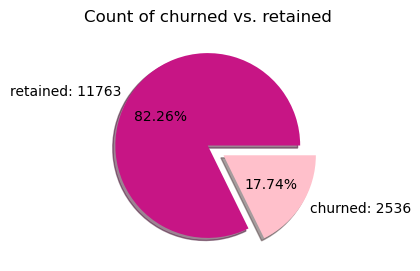

In [17]:
pie_plotter("label", "Count of churned vs. retained")

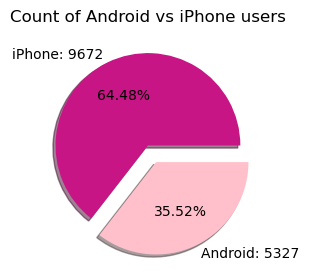

In [18]:
pie_plotter("device", "Count of Android vs iPhone users")

Text(0.5, 1.0, 'Distribution of Android and iPhone users between churned and retained group')

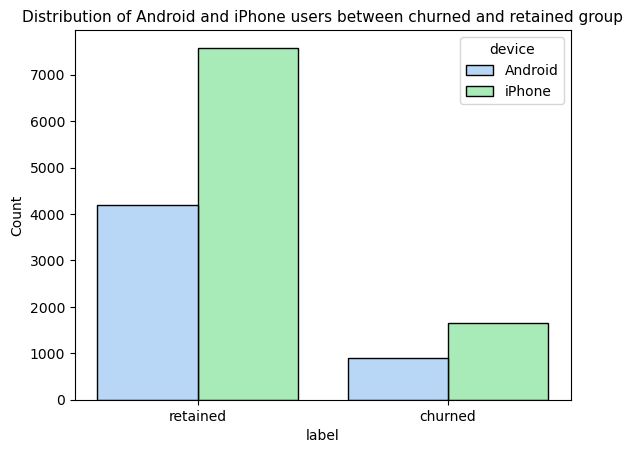

In [19]:
# Count of Android and iPhone users between churned and retained group
sns.histplot(data = df, x = 'label', hue = 'device', multiple = 'dodge', shrink = 0.8, palette ='pastel6')
plt.title("Distribution of Android and iPhone users between churned and retained group", fontsize = 11)

In [20]:
# Percentage of Android and iPhone users between churned and retained group
print(df.groupby(['label'])['device'].value_counts(normalize = True))

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64


**Observations:** 
* This dataset contains 82% retained users and 18% churned users.
* The ratio of iPhone and Android users is consistent between the churned group and the retained group, and those ratios are both consistent with the ratio found in the overall dataset.

Next, the medians of each variable is compared for churned and retained users. The reason for calculating the median and not the mean is so that the outliers don't unduly affect the portrayal of a typical user.

In [22]:
# Calculate median values of all columns for churned and retained users
df.groupby(['label']).median(numeric_only = True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


**Observations:** 
* Users who churned averaged ~3 more drives and sessions in the last month than retained users. However, the activity days of retained users is over twice as many days as churned users in the same time period.
* The median churned user drove ~200 more kilometers and 2.5 more hours during the last month than the median retained user.
* Churned users visited their favorite place 1 more frequently than retained users.

It seems that churned users had more drives in fewer days, and their trips were farther and longer in duration. Perhaps this is suggestive of a user profile.

In [24]:
# Calculate median km per drive for retained and churned users
df['km_per_drive'] = df['driven_km_drives']/df['drives']
median_km_per_drive = df.groupby(['label'])[['km_per_drive']].median(numeric_only = True).rename(columns={'km_per_drive': 'median_km_per_drive'})
mean_km_per_drive = df.groupby(['label'])[['km_per_drive']].mean(numeric_only = True).rename(columns={'km_per_drive': 'mean_km_per_drive'})
median_km_per_drive

,median_km_per_drive
label,
churned,74.109416
retained,75.014702


**Observation:** The median retained user drove about one more kilometer per drive than the median churned user.

In [26]:
# Calculate median drives per day for retained and churned users
df['drives_per_day'] = df['drives']/df['driving_days']
median_drives_per_day = df.groupby(['label'])[['drives_per_day']].median(numeric_only = True).rename(columns={'drives_per_day': 'median_drives_per_day'})
median_drives_per_day

,median_drives_per_day
label,
churned,10.0000
retained,4.0625


In [27]:
# Calculate median km per day for retained and churned users
df['km_per_day'] = df['driven_km_drives']/df['driving_days']
median_km_per_day = df.groupby(['label'])[['km_per_day']].median(numeric_only = True).rename(columns={'km_per_day': 'median_km_per_day'})
median_km_per_day

,median_km_per_day
label,
churned,697.541999
retained,289.549333


**Observations:**
* There is a small difference in the median km per drive for churned and retained users. Hypothesis test can be conducted to check if this difference is statistically significant.
* The median user who churned drove 698 kilometers each day they drove last month, which is ~240% the per day distance of retained users.
* The median churned user had a similarly disproportionate number of drives per day compared to retained users.

It seems that the churned users contain a high proportion of frequent drivers, may be even long-haul truckers.

In consideration of how much these users drive, it would be worthwhile to recommend to Waze that they gather more data on these drivers. It's possible that the reason for their driving so much is also the reason why the Waze app does not meet their specific set of needs, which may differ from the needs of a more typical driver, such as a commuter.

#### **Data Distribution**

In [30]:
# Helper function to plot box plots
def box_plotter(column_str, **kwargs):
    plt.figure(figsize=(5,2))
    sns.boxplot(x = df[column_str], **kwargs)
    plt.title(f'{column_str} box plot'.title(), fontsize = 10)

In [31]:
# Helper function to plot histograms
def hist_plotter(column_str, **kwargs):
    plt.figure(figsize=(10,5))
    a = sns.histplot(df[column_str], **kwargs)
    median = np.round(df[column_str].median(), 2)
    mean = np.round(df[column_str].mean(), 2)
    plt.axvline(median, color = 'red', linestyle = '--')
    plt.axvline(mean, color = 'green', linestyle = 'solid')
    bbox = dict(boxstyle="round", fc='#FFC000', alpha = 0.3, ec= '1')
    plt.text(0.8, 0.9, f'median = {median}', color = 'red', ha='left', va='top', transform=a.transAxes, bbox = bbox)
    plt.text(0.8, 0.8, f'mean = {mean}', color = 'green', ha='left', va='top', transform=a.transAxes, bbox = bbox)
    plt.title(f'{column_str} histogram'.title())

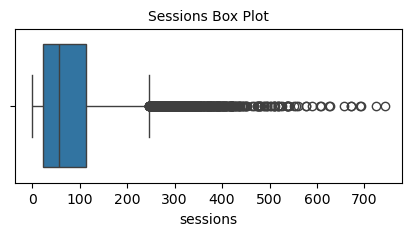

In [32]:
box_plotter('sessions')

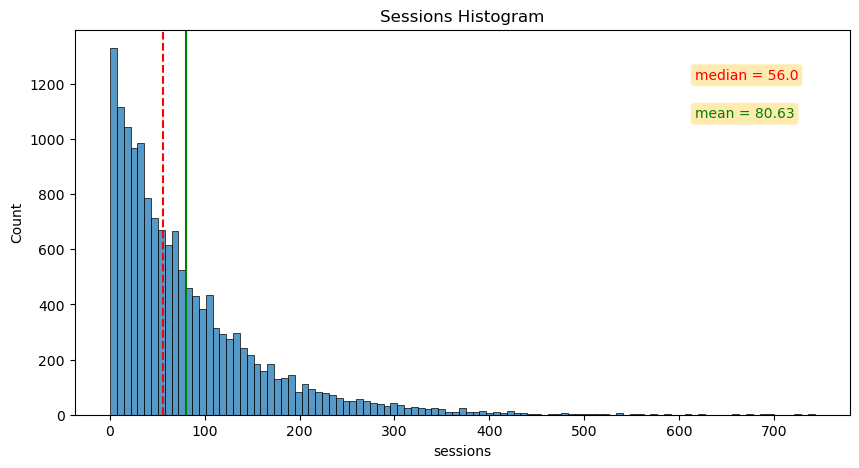

In [33]:
hist_plotter('sessions')

**Observation:** The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the box plot, some users have more than 700.

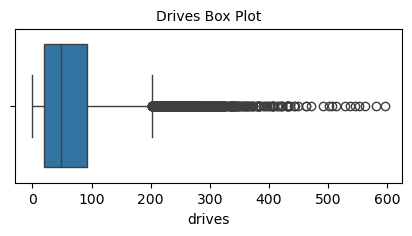

In [35]:
box_plotter('drives')

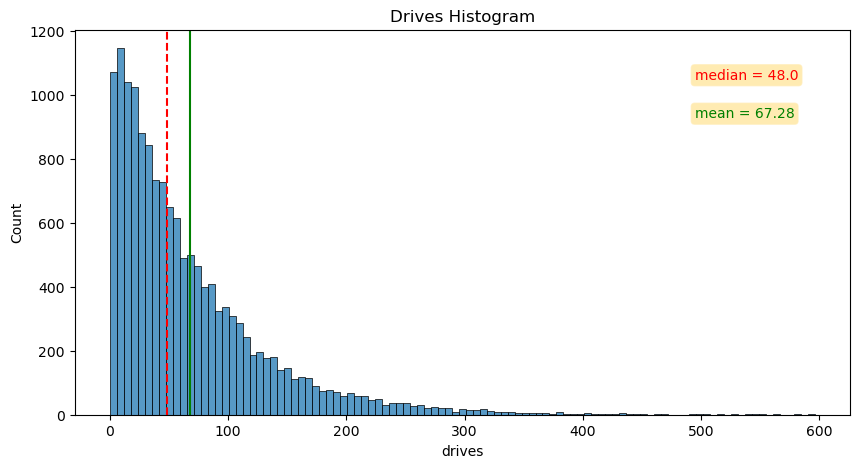

In [36]:
hist_plotter('drives')

**Observation:** The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed with a median of 48. However, some drivers had over 400 drives in the last month.

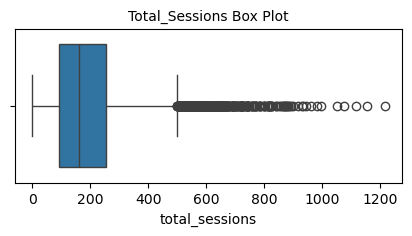

In [38]:
box_plotter('total_sessions')

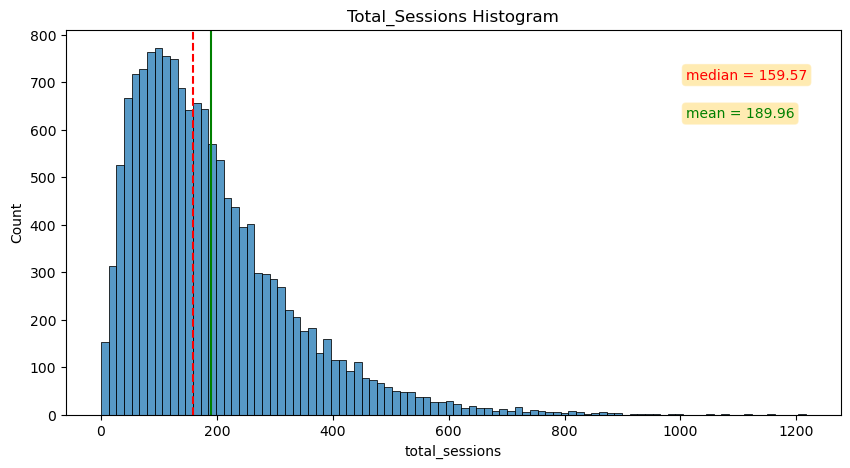

In [39]:
hist_plotter('total_sessions')

**Observation:** The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 56 and the median total sessions was ~160, then it seems that a large proportion of a user's (estimated) total drives might have taken place in the last month.

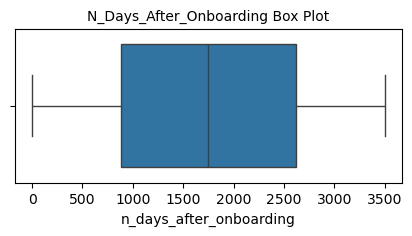

In [41]:
box_plotter('n_days_after_onboarding')

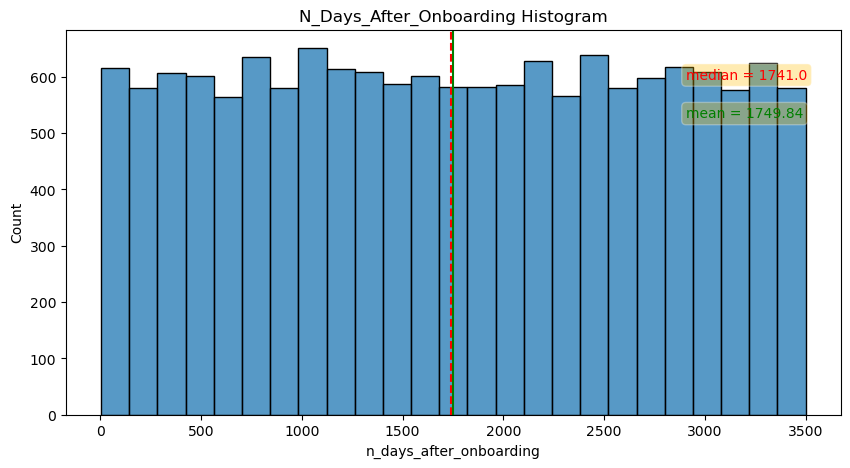

In [42]:
hist_plotter('n_days_after_onboarding')

**Observation:** The total user tenure is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

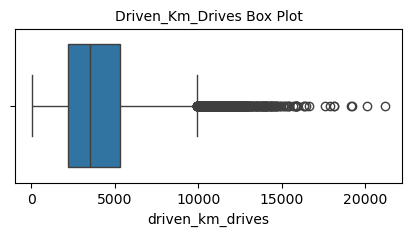

In [44]:
box_plotter('driven_km_drives')

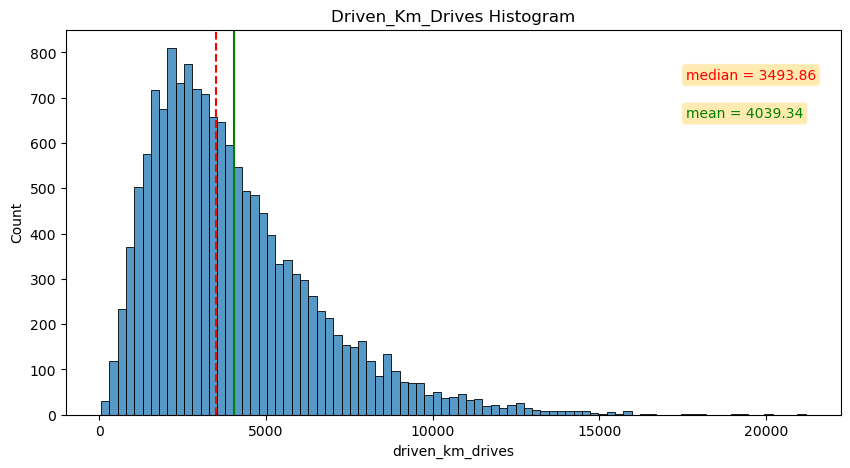

In [45]:
hist_plotter('driven_km_drives')

**Observation:** The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. However, some drives are larger than 20,000 km which is almost half the circumference of earth.

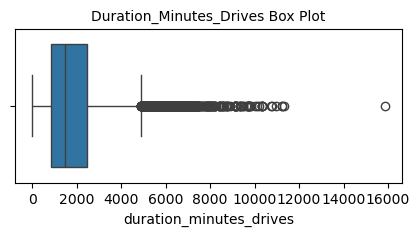

In [47]:
box_plotter('duration_minutes_drives')

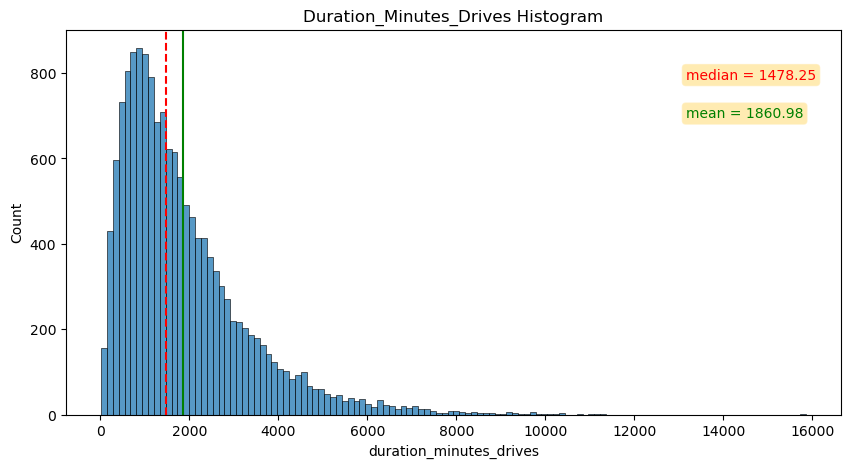

In [48]:
hist_plotter('duration_minutes_drives')

**Observation:** The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 150 hours over the month.

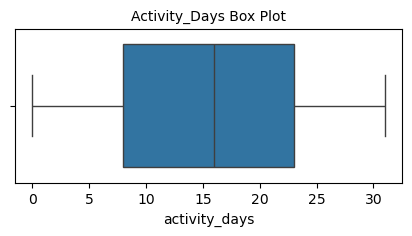

In [50]:
box_plotter('activity_days')

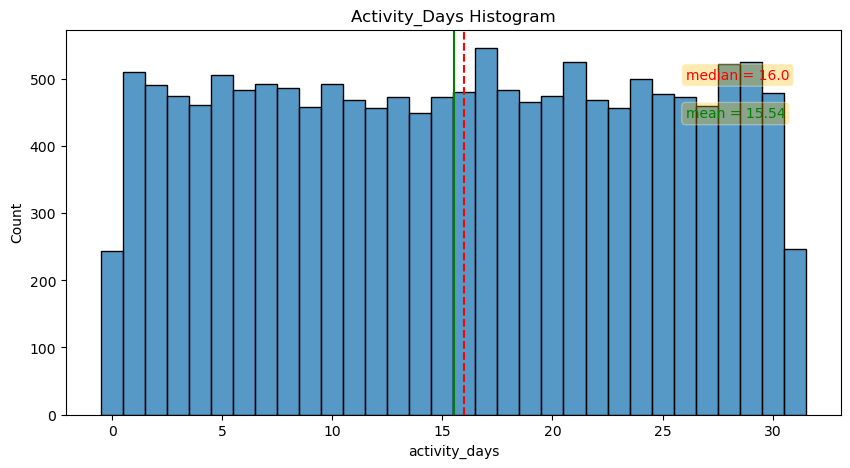

In [51]:
hist_plotter('activity_days', discrete = True)

**Observation:** Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of \~500 people opening the app on each count of days. However, there are \~250 people who didn't open the app at all and \~250 people who opened the app every day of the month.

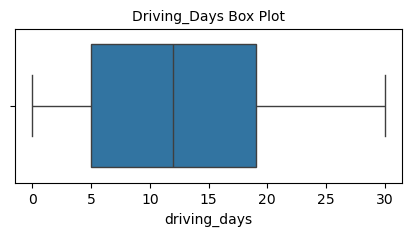

In [53]:
box_plotter('driving_days')

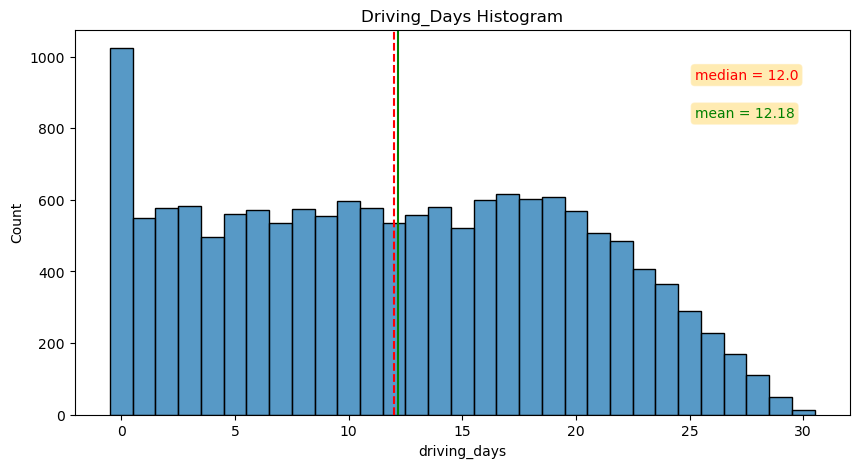

In [54]:
hist_plotter('driving_days', discrete = True)

**Observations:**
* The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.
* However, there were almost twice as many as users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each day, but there were only \~250 users who did not open the app at all during the month and \~250 users who opened the app every day.

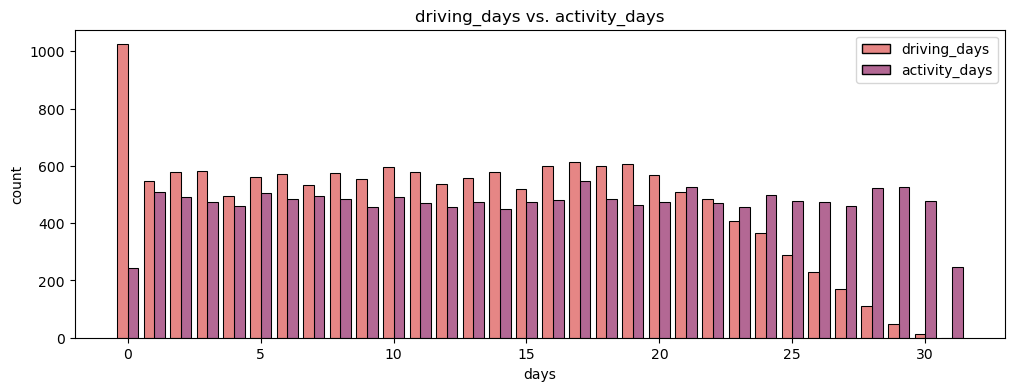

In [56]:
# Driving days vs activity days
plt.figure(figsize = (12, 4))
label = ['driving days', 'activity days']
sns.histplot([df['driving_days'], df['activity_days']],
             bins = range(0,35),
             multiple = 'dodge',
             discrete = True,
             shrink = 0.8,
             palette = "flare"
            )
plt.xlabel('days')
plt.ylabel('count')
plt.title('driving_days vs. activity_days');

**Observations:**
* There are fewer people who didn't use the app at all during the month and more people who didn't drive at all during the month. This illustrates the fact that these variables are related to each other but they are not the same.
* People probably just open the app more than they use the app to drive &mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.
* The number of days in the month is not the same between variables i.e. 30 for driving days and 31 for activity days.

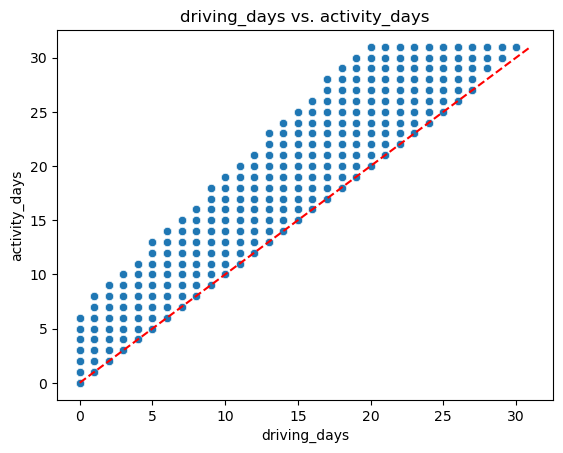

In [58]:
# Scatter plot of activity_days and driving_days
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--');

**Observation:** If you use the app to drive, then by definition it must count as a day-use as well. In other words, there cannot be more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Churn Rate Analysis**

Text(0.5, 1.0, 'Churn rate per activity day')

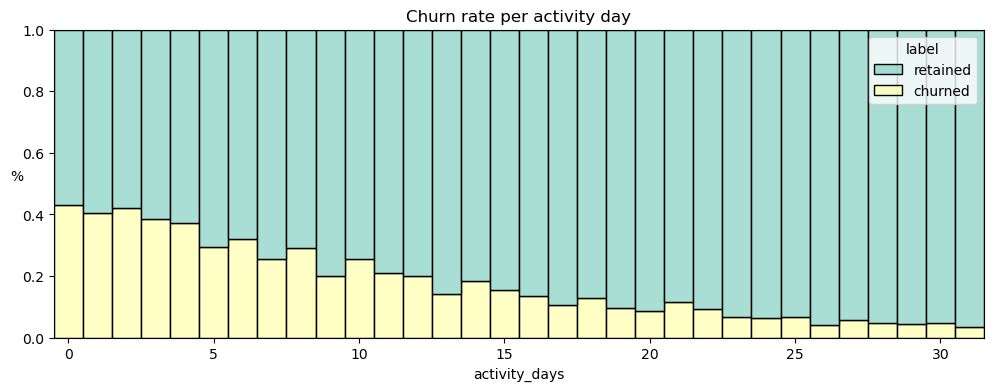

In [61]:
# Churn rate per number of activity days
plt.figure(figsize=(12,4))
sns.histplot(data=df,
             x='activity_days',
             bins=range(1,32),
             hue = 'label',
             multiple='fill',
             discrete=True,
            palette = "Set3")
plt.ylabel('%', rotation=0)
plt.title('Churn rate per activity day')

Text(0.5, 1.0, 'Churn rate per driving day')

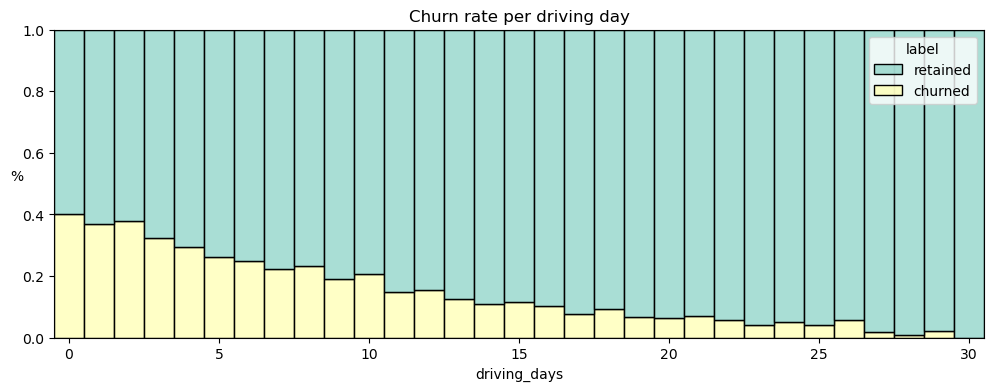

In [62]:
# Churn rate per number of driving days
plt.figure(figsize=(12,4))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue = 'label',
             multiple='fill',
             discrete=True,
            palette = "Set3")
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day')

**Observation:** 
* The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn.
* While 40% of the users who didn't use the app at all last month churned, nobody who used the app for 30 days churned.

In [64]:
# Proportion of sessions that occurred in the last month
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

In [65]:
df['percent_sessions_in_last_month'].median()

0.42309702992763176

In [66]:
df['n_days_after_onboarding'].median()

1741.0

**Observation:** Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Text(0.5, 1.0, 'Num. days after onboarding for users with >=40% sessions in last month')

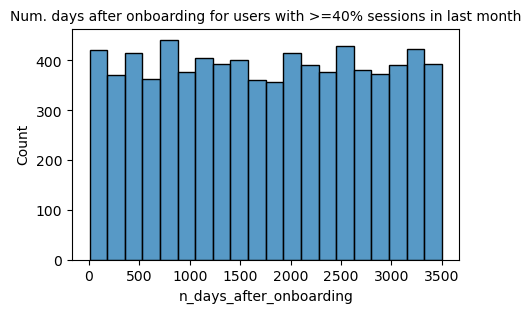

In [68]:
# Histogram of no. of onboarding days
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Num. days after onboarding for users with >=40% sessions in last month', fontsize = 10)

**Observation:** The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **2.2.2. Hypothesis Testing**

In [71]:
median_km_per_drive

,median_km_per_drive
label,
churned,74.109416
retained,75.014702


It is observed that the number of drives and driven distance per day is significantly larger for churned users than retained users. However, there is a  small difference in the median km per drive for both groups. Hypothesis test is conducted to assess whether the difference is statistically significant.

$H_0$: There is no difference in the median km per drive between churned and retained users.

$H_A$: There is a difference in the median km per drive between churned and retained users.

In [74]:
# Mood's Median test with 5% significance level
from scipy import stats
median_km_per_drive_churned = df[df['label']=="churned"]['km_per_drive']
median_km_per_drive_retained = df[df['label']=="retained"]['km_per_drive']
stats.median_test(median_km_per_drive_retained, median_km_per_drive_churned)

MedianTestResult(statistic=0.0561442317467908, pvalue=0.8126973327766099, median=74.90593509523809, table=array([[5887, 1262],
       [5876, 1274]], dtype=int64))

**Result:** Since the p-value is larger than the significance level of 5%, we fail to reject the null hypothesis and conclude that the difference is not statistically significant.

### **2.2.3. Handling missing data and outliers**

#### **Missing Data**

In [78]:
# Check no. of missing values
df.isnull().sum()

ID                                  0
label                             700
sessions                            0
drives                              0
total_sessions                      0
n_days_after_onboarding             0
total_navigations_fav1              0
total_navigations_fav2              0
driven_km_drives                    0
duration_minutes_drives             0
activity_days                       0
driving_days                        0
device                              0
km_per_drive                        0
drives_per_day                      7
km_per_day                          0
percent_sessions_in_last_month      0
dtype: int64

There are 700 rows with missing labels. However, it is observed that there is no remarkable difference in summary statistics between rows with labels and without labels. 

Hence, the missing rows can be dropped.

In [80]:
# Create df with not null rows
df_nn = df[~df['label'].isnull()]

There are 7 rows with missing values in `drives_per_day`.

In [82]:
# Check missing rows in drives_per_day
df_nn[df_nn['drives_per_day'].isnull()]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,drives_per_day,km_per_day,percent_sessions_in_last_month
1806,1806,retained,0,0,37.168690,3098,236,0,5570.745476,943.950161,6,0,Android,inf,NaN,inf,0.0
3451,3451,retained,0,0,210.090088,2873,210,35,12012.320180,4804.667454,1,0,Android,inf,NaN,inf,0.0
6375,6375,retained,0,0,99.767601,1386,21,0,4169.721686,3154.856024,2,0,Android,inf,NaN,inf,0.0
8122,8122,retained,0,0,132.322350,89,174,104,5044.893956,2205.094060,4,0,iPhone,inf,NaN,inf,0.0
10586,10586,churned,0,0,222.107433,980,0,6,4932.029466,2656.000047,3,0,Android,inf,NaN,inf,0.0
12273,12273,retained,0,0,8.608561,413,43,19,1016.211180,264.911031,0,0,iPhone,inf,NaN,inf,0.0
13126,13126,churned,0,0,48.812090,1214,668,114,2734.985909,2067.374799,0,0,iPhone,inf,NaN,inf,0.0


These values are missing due to division by 0 scenario, which can be imputed. Additionally, there are inifinte values resulting from division by zero, which can also be imputed.

#### **Imputing null and infinite values**

In [85]:
# Create copy of data
df_nn_c = df_nn.copy()

In [86]:
# Impute missing values to 0
df_nn_c.loc[df_nn_c['drives_per_day'].isnull(), 'drives_per_day'] = 0
df_nn_c.isnull().sum()

ID                                0
label                             0
sessions                          0
drives                            0
total_sessions                    0
n_days_after_onboarding           0
total_navigations_fav1            0
total_navigations_fav2            0
driven_km_drives                  0
duration_minutes_drives           0
activity_days                     0
driving_days                      0
device                            0
km_per_drive                      0
drives_per_day                    0
km_per_day                        0
percent_sessions_in_last_month    0
dtype: int64

In [87]:
# Verify the rows
df_nn_c.loc[df_nn[df_nn['drives_per_day'].isnull()].index]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,drives_per_day,km_per_day,percent_sessions_in_last_month
1806,1806,retained,0,0,37.168690,3098,236,0,5570.745476,943.950161,6,0,Android,inf,0.0,inf,0.0
3451,3451,retained,0,0,210.090088,2873,210,35,12012.320180,4804.667454,1,0,Android,inf,0.0,inf,0.0
6375,6375,retained,0,0,99.767601,1386,21,0,4169.721686,3154.856024,2,0,Android,inf,0.0,inf,0.0
8122,8122,retained,0,0,132.322350,89,174,104,5044.893956,2205.094060,4,0,iPhone,inf,0.0,inf,0.0
10586,10586,churned,0,0,222.107433,980,0,6,4932.029466,2656.000047,3,0,Android,inf,0.0,inf,0.0
12273,12273,retained,0,0,8.608561,413,43,19,1016.211180,264.911031,0,0,iPhone,inf,0.0,inf,0.0
13126,13126,churned,0,0,48.812090,1214,668,114,2734.985909,2067.374799,0,0,iPhone,inf,0.0,inf,0.0


In [88]:
# Check columns with infinite values
df_nn_c.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,drives_per_day,km_per_day,percent_sessions_in_last_month
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,1.429900e+04,1.429900e+04,1.429900e+04,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530,inf,inf,inf,0.449837
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835,NaN,NaN,NaN,0.286863
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,1.008775e+00,0.000000e+00,3.022063e+00,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,3.325389e+01,1.800000e+00,1.675616e+02,0.196890
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,7.490594e+01,4.666667e+00,3.241789e+02,0.424310
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,1.854667e+02,1.217157e+01,7.608293e+02,0.687251
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,inf,inf,inf,1.530637


The `km_per_drive`, `drives_per_day`, `km_per_day` columns have infinite values. These are imputed to zero.

In [90]:
# Impute infinite values to zero (km_per_drive)
df_nn_c.loc[df_nn_c['km_per_drive']==np.inf, 'km_per_drive'] = 0

In [91]:
# Impute infinite values to zero (drives_per_day)
df_nn_c.loc[df_nn_c['drives_per_day']==np.inf, 'drives_per_day'] = 0

In [92]:
# Impute infinite values to zero (km_per_day)
df_nn_c.loc[df_nn_c['km_per_day']==np.inf, 'km_per_day'] = 0

In [93]:
# Verify the columns
df_nn_c.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,drives_per_day,km_per_day,percent_sessions_in_last_month
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530,232.269197,9.360417,581.942399,0.449837
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835,616.197409,19.734906,1038.254509,0.286863
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,32.486524,1.230769,136.168003,0.196890
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,72.947059,3.666667,273.301012,0.424310
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,179.347527,9.000000,558.018761,0.687251
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15777.426560,395.000000,15420.234110,1.530637


#### **Imputing Outliers**

A point is considered as an outlier if it is below minimum or above maximum.

Minimum = Q1 - 1.5*(IQR)

Maximum = Q3 + 1.5*(IQR)

Values exceeding this range are imputed to their respective bounds.

In [96]:
# Function for imputing outliers
def outlier_imputer(column_list):
     for col in column_list:
         q1 = df_nn_c[col].quantile(0.25)
         q3 = df_nn_c[col].quantile(0.75)
         iqr = q3 - q1
         lower_bound = q1 - 1.5 * (iqr)
         upper_bound = q3 + 1.5 * (iqr)
         print(f'{col:>25} | Minimum value before imputation: {np.round(df_nn_c[col].min(), 2)} | Maximum value before imputation: {np.round(df_nn_c[col].max(), 2)}')
         df_nn_c.loc[df_nn_c[col] < lower_bound, col] = lower_bound
         df_nn_c.loc[df_nn_c[col] > upper_bound, col] = upper_bound
         print(f'{col:>25} | Minimum value after imputation: {np.round(df_nn_c[col].min(), 2)}  | Maximum value after imputation: {np.round(df_nn_c[col].max(), 2)}')

In [97]:
df_nn_c.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,drives_per_day,km_per_day,percent_sessions_in_last_month
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,11.894737,138.360267,0.953670
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,128.186173,9.727273,1246.901868,0.406856
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,11.875000,382.393602,0.841186
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,13.333333,304.530374,0.724968
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,3.777778,219.455667,0.499266


In [98]:
outlier_imputer(['sessions', 'drives', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives', 'km_per_drive', 'drives_per_day', 'km_per_day', 'percent_sessions_in_last_month'])

                 sessions | Minimum value before imputation: 0 | Maximum value before imputation: 743
                 sessions | Minimum value after imputation: 0  | Maximum value after imputation: 243
                   drives | Minimum value before imputation: 0 | Maximum value before imputation: 596
                   drives | Minimum value after imputation: 0.0  | Maximum value after imputation: 202.5
           total_sessions | Minimum value before imputation: 0.22 | Maximum value before imputation: 1216.15
           total_sessions | Minimum value after imputation: 0.22  | Maximum value after imputation: 498.16
         driven_km_drives | Minimum value before imputation: 60.44 | Maximum value before imputation: 21183.4
         driven_km_drives | Minimum value after imputation: 60.44  | Maximum value after imputation: 9923.95
  duration_minutes_drives | Minimum value before imputation: 18.28 | Maximum value before imputation: 15851.73
  duration_minutes_drives | Minimum value af

C:\Users\Dhananjay\AppData\Local\Temp\ipykernel_5920\2414137175.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-89.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_nn_c.loc[df_nn_c[col] < lower_bound, col] = lower_bound


### **2.2.4. Feature Engineering**

In [100]:
# Convert categorical data to numeric using one hot encoding
df_nn_c['label'] = np.where(df_nn_c['label']=='churned', 1, 0)
df_nn_c['device'] = np.where(df_nn_c['device']=='iPhone', 1, 0)
df_nn_c

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_drive,drives_per_day,km_per_day,percent_sessions_in_last_month
0,0,0,243,202.5,296.748273,2276,208,0,2628.845068,1985.775061,28,19,0,11.632058,11.894737,138.360267,0.953670
1,1,0,133,107.0,326.896596,1225,19,64,9923.950541,3160.472914,13,11,1,128.186173,9.727273,1190.794898,0.406856
2,2,0,114,95.0,135.522926,2651,0,0,3059.148818,1610.735904,14,8,0,32.201567,11.875000,382.393602,0.841186
3,3,0,49,40.0,67.589221,15,322,7,913.591123,587.196542,7,3,1,22.839778,13.333333,304.530374,0.724968
4,4,0,84,68.0,168.247020,1562,166,5,3950.202008,1219.555924,27,18,0,58.091206,3.777778,219.455667,0.499266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,0,60,55.0,207.875622,140,317,0,2890.496901,2186.155708,25,17,1,52.554489,3.235294,170.029229,0.288634
14995,14995,0,42,35.0,187.670313,2505,15,10,4062.575194,1208.583193,25,20,0,116.073577,1.750000,203.128760,0.223797
14996,14996,0,243,202.5,422.017241,1873,17,0,3097.825028,1031.278706,18,17,1,14.145320,12.882353,182.225002,0.646893
14997,14997,1,149,120.0,180.524184,3150,45,0,4051.758549,254.187763,6,6,1,33.764655,20.000000,675.293092,0.825374


<Axes: >

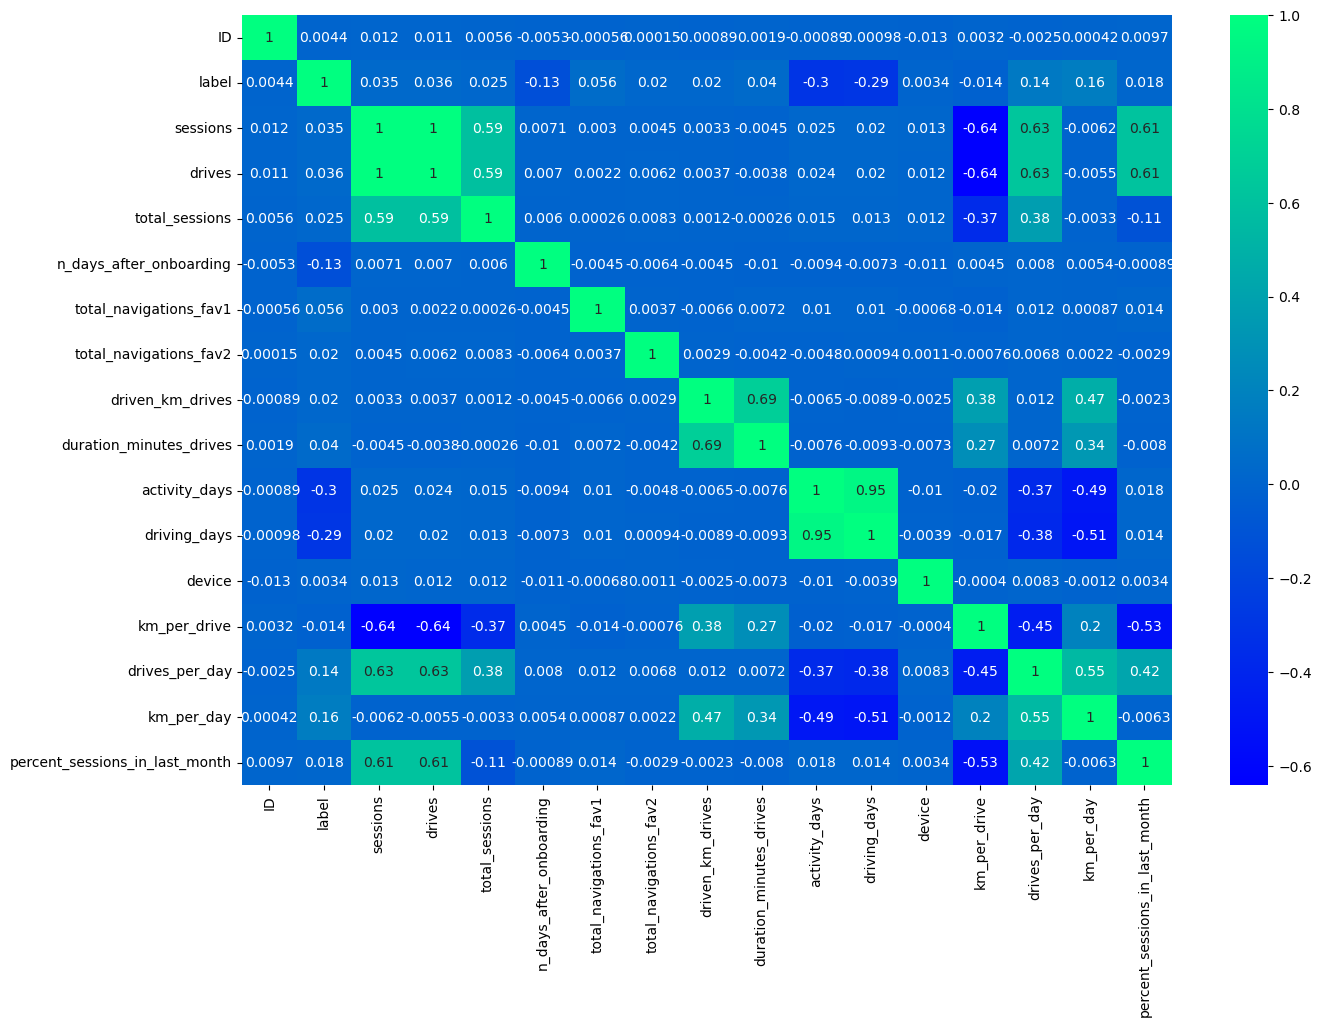

In [101]:
# Check correlation between features
plt.figure(figsize = (15,10))
sns.heatmap(df_nn_c.corr(method = 'pearson'), annot = True, cmap = 'winter')

**Observations:**
1. `sessions`, `drives` and `total_sessions` are interrelated, but `drives` shows a stronger correlation with the `label`, so it is chosen for prediction.
2. `driven_km_drives` is highly correlated with `duration_minutes_drives`, and since `duration_minutes_drives` is more strongly correlated with `label`, it is selected.
3. `activity_days` is strongly correlated with `driving_days`, and `activity_days` is chosen for prediction.

## **2.3. PACE: Construct**

This stage consists of following tasks:
1. Split the features and outcome variable.
2. Generate train, validation and test datasets.
3. Train multiple models.

### **2.3.1. Split the features and outcome variable.**

In [105]:
# Split features and outcome variables
df_final = df_nn_c.copy()
y = df_final['label']
x = df_final.drop(columns = ['ID', 'label', 'sessions', 'total_sessions', 'driven_km_drives', 'driving_days', 'km_per_drive', 'percent_sessions_in_last_month'])

### **2.3.2. Generate holdout datasets**

In [107]:
# Split data in train (60%), validation (20%) and test sets(20%)
from sklearn.model_selection import train_test_split
# Test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42)

# Validation dataset
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.25, stratify = y_train, random_state = 42)

In [108]:
# Scale training data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(x_tr)
x_tr_scaled = std_scaler.transform(x_tr)

### **2.3.3. Train multiple models**

Multiple ML models are trained on the the training dataset. These models are then used to make predictions on validation dataset. The top-performing model is then selected to make predictions on the test dataset.

**Recall** would be the best metric to evaluate models for churn analysis. It measures the ability of the model to correctly identify all the actual churn cases (true positives). In churn analysis, we typically want to focus on identifying customers who are likely to churn, so having a higher recall ensures that fewer churn customers are missed. Missing a churner could result in lost opportunities for retention efforts.

The dataset has an 80:20 class imbalance ratio which can lead to challenges for the models, especially when focusing on improving recall.
Following strategies are used to mitigate class imbalance:
1. Class Weights - Algorithms like Logistic Regression, Random Forest, etc. allow to assign different weights to the classes. By assigning a higher weight to the minority class, the model is encouraged to focus more on predicting churners, thus improving recall.
2. Resampling - Oversampling the minority class can help the model learn more from the minority class.

In [112]:
# Scale validation set using standard scaler
x_val_scaled = std_scaler.transform(x_val)

In [113]:
# Function to predict output
def predict_value(model_name, x_value):
    y_predictions = model_name.predict(x_value)
    return y_predictions

In [114]:
# Function to print performance scores
from sklearn import metrics

# Empty lists for storing scores
precision_list = []
recall_list = []
f1_list = []
accuracy_list = []
roc_auc_list = []

def print_scores(y_actual, y_pred, append):
    print('Performance Scores')
    precision = np.round(metrics.precision_score(y_actual, y_pred), 4)
    recall = np.round(metrics.recall_score(y_actual, y_pred), 4)
    f1 = np.round(metrics.f1_score(y_actual, y_pred), 4)
    accuracy = np.round(metrics.accuracy_score(y_actual, y_pred), 4)
    roc_auc = np.round(metrics.roc_auc_score(y_actual, y_pred), 4)
    print("Precision: ", precision)
    print('Recall:', recall)
    print('f1:', f1)
    print('Accuracy:', accuracy)
    print('ROC_AUC:', roc_auc)
    
    # Append scores to lists
    if append:
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        accuracy_list.append(accuracy)
        roc_auc_list.append(roc_auc)

In [115]:
# Function to plot ROC and confusion matrix
from sklearn.metrics import RocCurveDisplay
def roc_conf_matrix(y_val, y_pred):
    # Plot ROC 
    RocCurveDisplay.from_predictions(y_val, y_pred)
    plt.show()

    # Plot confusion matrix
    cm = metrics.confusion_matrix(y_val, y_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['retained', 'churned'])
    disp.plot()

In [116]:
# Function to plot Precision-Recall Curve
from sklearn.metrics import PrecisionRecallDisplay
def pr_plotter(y_val, y_pred):
    PrecisionRecallDisplay.from_predictions(y_val, y_pred)
    plt.show()

### **Establish Baseline Model**

Logistic regression is implemented as a baseline model to benchmark churn prediction performance and evaluate further improvements.

In [119]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression

log_reg_bl = LogisticRegression(penalty = 'l2', max_iter = 400)
log_reg_bl.fit(x_tr_scaled, y_tr)

LogisticRegression(max_iter=400)

In [120]:
# Predict on validation set
y_pred = predict_value(log_reg_bl, x_val_scaled)

In [121]:
# Print scores
print_scores(y_val, y_pred, append = True)

Performance Scores
Precision:  0.4545
Recall: 0.0888
f1: 0.1485
Accuracy: 0.8196
ROC_AUC: 0.5329


### **Models with Class Weights**

#### **A. Logistic Regression Model**

Logistic regression makes the following assumptions:
1. Independent observations - It is assumed that the collected data has independent observations.
2. No multicollinearity - The features are selected accordingly.
3. No extreme outliers - This has been addressed.
4. Linear relationship between x and logit of y - This will be verified after modeling.

In [124]:
# Train logistic regression model
log_reg = LogisticRegression(penalty = 'l2', max_iter = 400, class_weight = 'balanced')
log_reg.fit(x_tr_scaled, y_tr)

LogisticRegression(class_weight='balanced', max_iter=400)

In [125]:
# Print coefficients and intercept
print(pd.Series(log_reg.coef_[0], index = x_tr.columns))
print(log_reg.intercept_)

drives                     0.137694
n_days_after_onboarding   -0.380484
total_navigations_fav1     0.185383
total_navigations_fav2     0.045983
duration_minutes_drives    0.067543
activity_days             -0.895641
device                     0.012174
drives_per_day            -0.070178
km_per_day                 0.115068
dtype: float64
[-0.31372861]


In [126]:
# Check model assumption
class_probability = log_reg.predict_proba(x_tr_scaled)
class_probability

# Create copy and rename array columns
x_tr_scaled_copy = pd.DataFrame(x_tr_scaled.copy())
for i in range(len(list(x_tr.columns))):
    x_tr_scaled_copy = x_tr_scaled_copy.rename(columns = {i: list(x_tr.columns)[i]})

# Calculate logit of y
x_tr_scaled_copy['logit'] = [np.log(prob[1] / prob[0]) for prob in class_probability]
x_tr_scaled_copy.head()

,drives,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,duration_minutes_drives,activity_days,device,drives_per_day,km_per_day,logit
0,2.488846,-0.045699,-0.130912,0.904491,-0.027603,0.383258,0.737252,1.880261,-0.695600,-0.484464
1,-0.281220,1.671689,-0.628110,0.180449,0.058356,1.272471,-1.356388,-0.630017,-0.746701,-2.290601
2,1.721890,-0.597682,-0.825627,-0.656725,0.337566,-0.839409,0.737252,2.101017,0.159560,0.622018
3,-0.786508,1.050337,-0.825627,-0.634099,-1.096969,0.716713,0.737252,-0.741650,-0.804879,-1.751481
4,0.729358,1.270338,-0.709842,1.243886,2.483568,1.717077,0.737252,-0.420704,-0.146640,-2.119549


In [127]:
# Scatterplots of logit vs features
features_list = list(x_tr.columns)

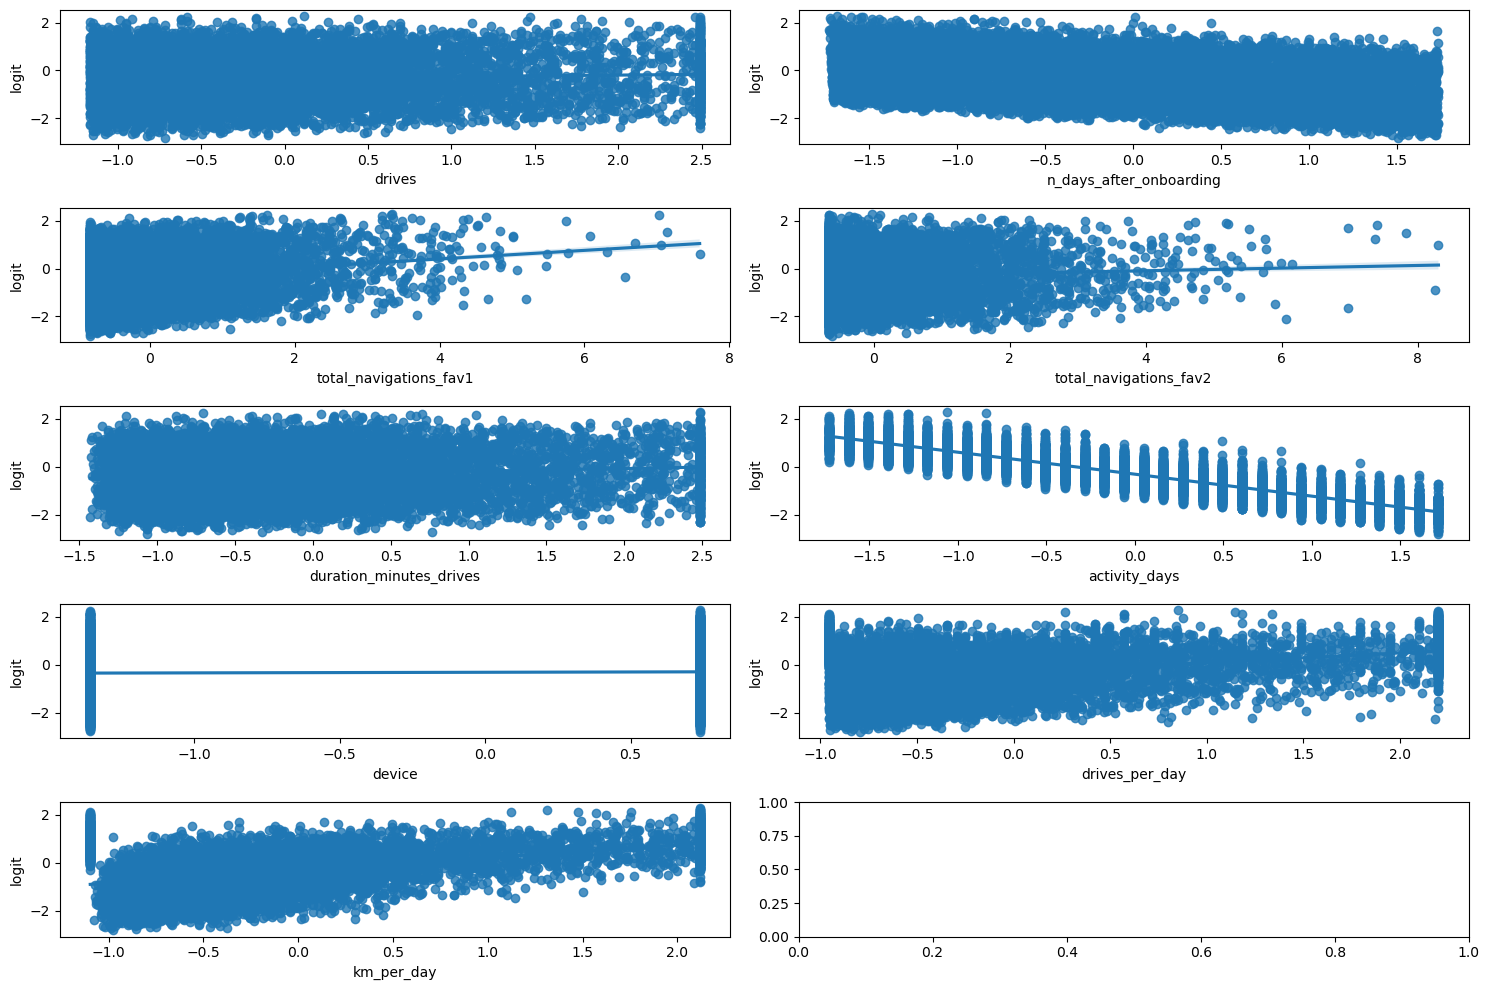

In [128]:
fig, axes = plt.subplots(5, 2, figsize = (15, 10))
axes = axes.flatten()
for i, feat in enumerate(features_list):
    sns.regplot(x = x_tr_scaled_copy[feat], y = x_tr_scaled_copy['logit'], ax = axes[i])
fig.tight_layout()
plt.show()   

In [129]:
# Predict on validation set
y_pred = predict_value(log_reg, x_val_scaled)

In [130]:
# Print scores
print_scores(y_val, y_pred, append = True)

Performance Scores
Precision:  0.3222
Recall: 0.7199
f1: 0.4451
Accuracy: 0.6818
ROC_AUC: 0.6968


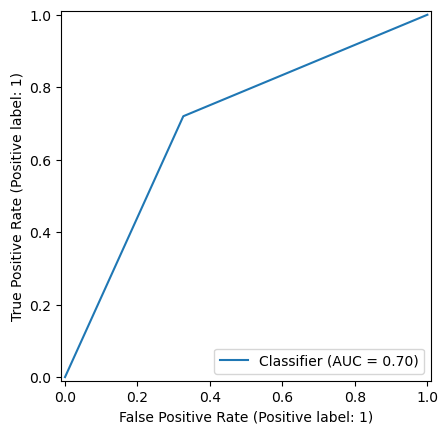

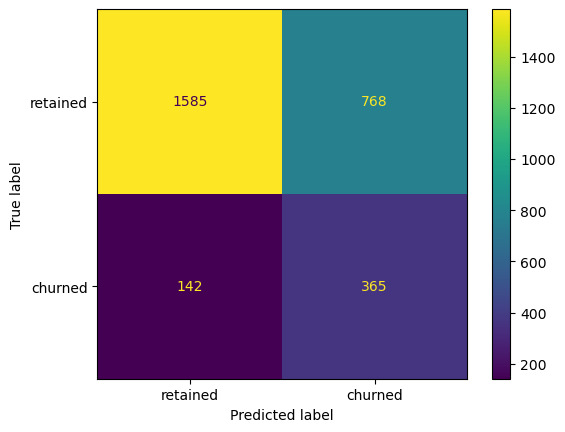

In [131]:
# Plot ROC and confusion matrix
roc_conf_matrix(y_val, y_pred)

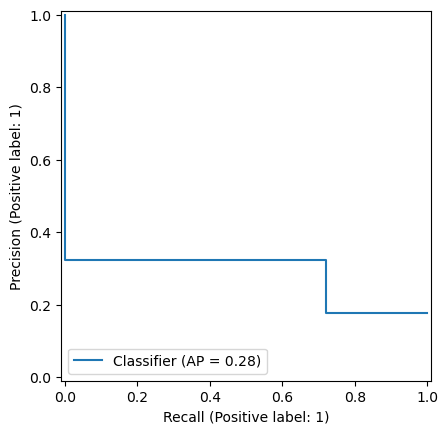

In [132]:
# Plot PR Curve
pr_plotter(y_val, y_pred)

#### **B. Naive Bayes Model**

In [134]:
# Train Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_tr_scaled, y_tr)

GaussianNB()

In [135]:
gnb.class_prior_

array([0.82259005, 0.17740995])

In [136]:
# Predict on validation set
y_pred = predict_value(gnb, x_val_scaled)

In [137]:
# Print scores
print_scores(y_val, y_pred, append = True)

Performance Scores
Precision:  0.3233
Recall: 0.3176
f1: 0.3204
Accuracy: 0.7612
ROC_AUC: 0.5872


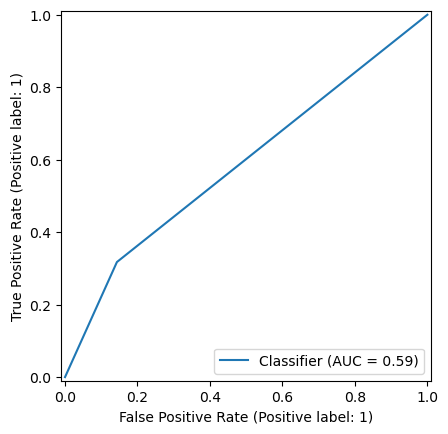

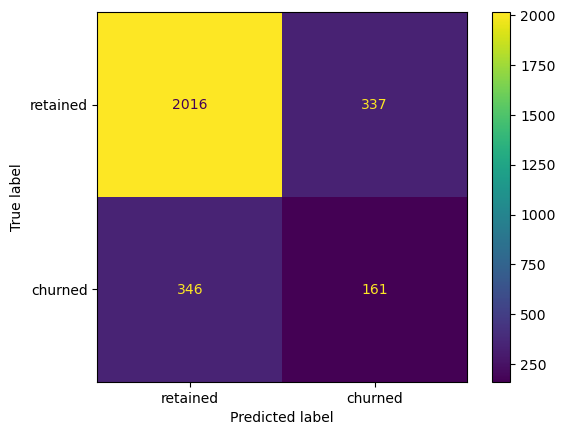

In [138]:
# Plot ROC and confusion matrix
roc_conf_matrix(y_val, y_pred)

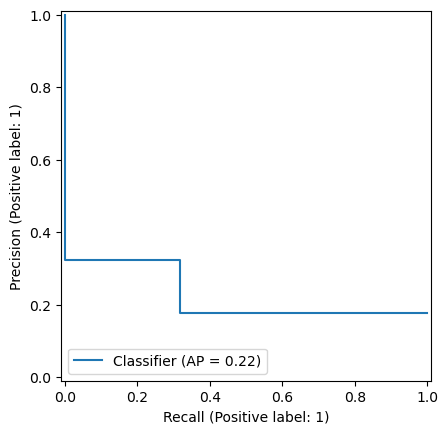

In [139]:
# Plot PR Curve
pr_plotter(y_val, y_pred)

#### **C. Random Forest Model**

In [141]:
# Define hyperparameters for tuning
tree_params_rf = {'max_depth': [2, 5, 10, 20],
                 'n_estimators': [50, 100, 200]}

In [142]:
# Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0, class_weight = 'balanced')
random_forest_cv = GridSearchCV(rf, tree_params_rf, scoring = 'recall', cv = 5, refit = 'recall')

In [143]:
%%time
# Fit the training data into model
random_forest_cv.fit(x_tr_scaled, y_tr)

CPU times: total: 2min 15s
Wall time: 2min 20s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'max_depth': [2, 5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             refit='recall', scoring='recall')

In [144]:
# Best hyperparameters and score
print(random_forest_cv.best_params_)
print(random_forest_cv.best_score_)

{'max_depth': 2, 'n_estimators': 50}
0.6971138912855911


In [145]:
# Assign the best estimator to a variable for prediction
random_forest_tuned = random_forest_cv.best_estimator_

In [146]:
%%time
# Predict on validation set
y_pred = predict_value(random_forest_tuned, x_val_scaled)

CPU times: total: 15.6 ms
Wall time: 11.3 ms


In [147]:
# Print scores on validation set
print_scores(y_val, y_pred, append = True)

Performance Scores
Precision:  0.3072
Recall: 0.6943
f1: 0.4259
Accuracy: 0.6682
ROC_AUC: 0.6784


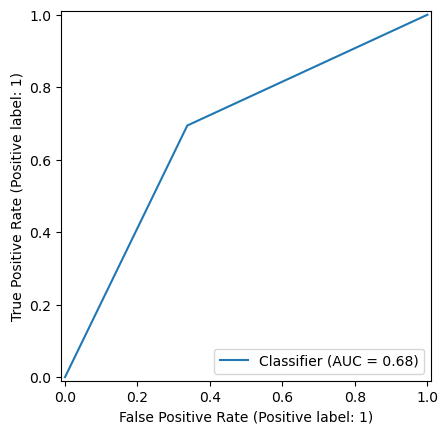

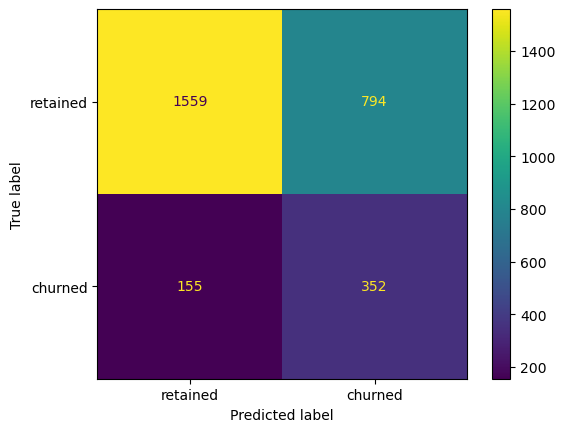

In [148]:
# Plot ROC and confusion matrix
roc_conf_matrix(y_val, y_pred)

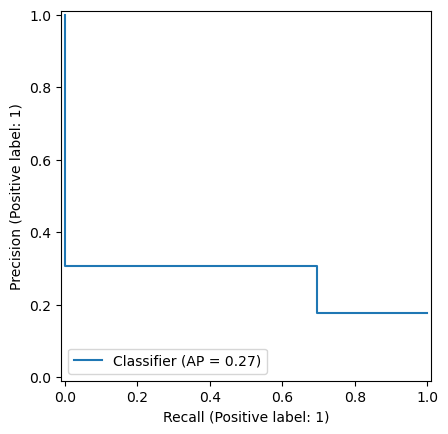

In [149]:
# Plot PR Curve
pr_plotter(y_val, y_pred)

#### **D. AdaBoost Model**

In [151]:
# Train AdaBoost Model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state = 0, class_weight = 'balanced', max_depth = 4)
adboost = AdaBoostClassifier(estimator = decision_tree, algorithm = 'SAMME')
adboost.fit(x_tr_scaled, y_tr)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=4,
                                                    random_state=0))

In [152]:
# Predict on validation set
y_pred = predict_value(adboost, x_val_scaled)

In [153]:
# Print scores on validation set
print_scores(y_val, y_pred, append = True)

Performance Scores
Precision:  0.3265
Recall: 0.6923
f1: 0.4437
Accuracy: 0.6923
ROC_AUC: 0.6923


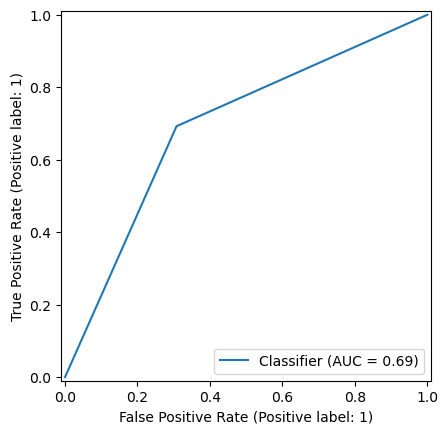

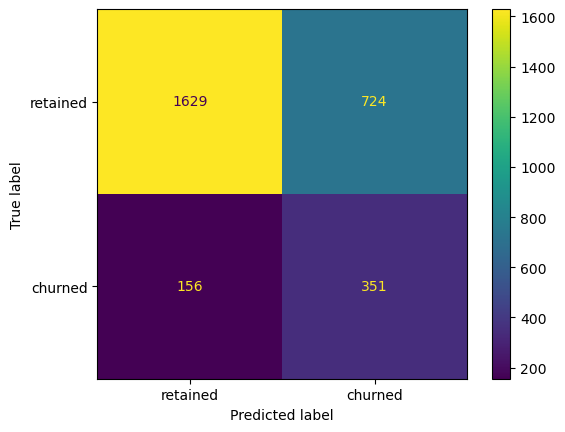

In [154]:
# Plot ROC and confusion matrix
roc_conf_matrix(y_val, y_pred)

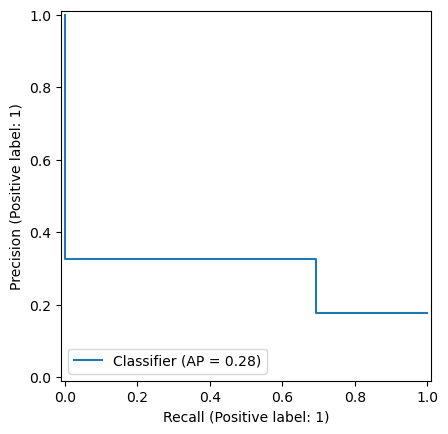

In [155]:
# Plot PR Curve
pr_plotter(y_val, y_pred)

#### **E. XGBoost Model**

In [157]:
# Define hyperparameters for tuning
tree_params_xgb = {'max_depth': [2, 5, 10],
                 'n_estimators': [50, 100, 200]}

In [158]:
# Grid Search
from xgboost import XGBClassifier

# Control the balance of positive and negative weights
# for unbalanced classes using scale_pos_weight parameter of XGBoost
# Typical value = sum(negative instances)/sum(positive instances)
scale_pos_weight = (y_tr.shape[0]- y_tr.sum()) / y_tr.sum()

xgb = XGBClassifier(random_state = 0, objective = 'binary:logistic', scale_pos_weight = scale_pos_weight)
xgb_cv = GridSearchCV(xgb, tree_params_xgb, scoring = 'recall', cv = 5, refit = 'recall')

In [159]:
%%time
# Fit the training data into model
xgb_cv.fit(x_tr_scaled, y_tr)

CPU times: total: 45.2 s
Wall time: 25.8 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'max_depth': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             refit='recall', scoring='recall')

In [160]:
# Best hyperparameters and score
print(xgb_cv.best_params_)
print(xgb_cv.best_score_)

{'max_depth': 2, 'n_estimators': 50}
0.681997411561691


In [161]:
%%time
# Assign the best estimator to a variable for prediction
xgb_tuned = xgb_cv.best_estimator_

CPU times: total: 0 ns
Wall time: 0 ns


In [162]:
# Predict on validation set
y_pred = predict_value(xgb_tuned, x_val_scaled)

In [163]:
# Print scores on validation set
print_scores(y_val, y_pred, append = True)

Performance Scores
Precision:  0.3219
Recall: 0.6844
f1: 0.4379
Accuracy: 0.6885
ROC_AUC: 0.6869


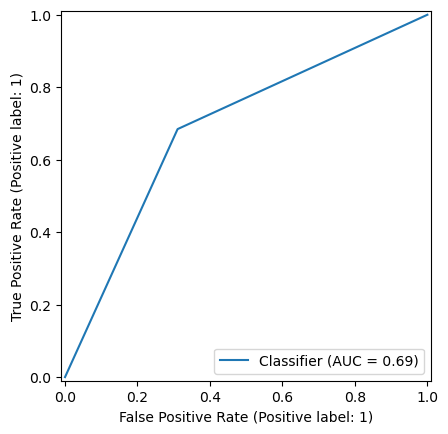

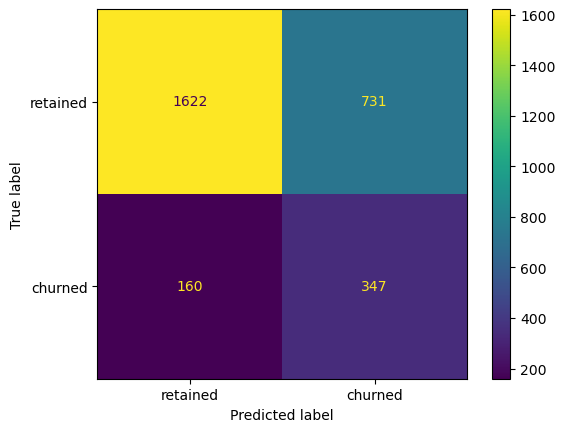

In [164]:
# Plot ROC and confusion matrix
roc_conf_matrix(y_val, y_pred)

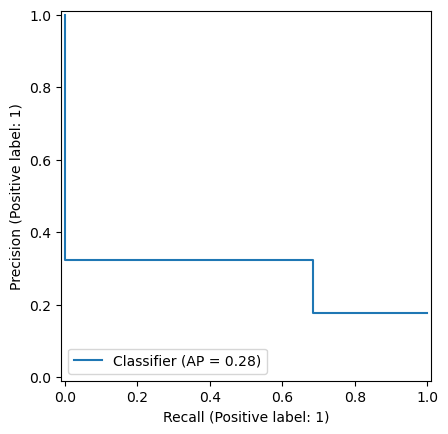

In [165]:
# Plot PR Curve
pr_plotter(y_val, y_pred)

#### **F. Support Vector Machine**

In [167]:
# Train SVM
from sklearn.svm import SVC
svm = SVC(random_state = 0, kernel = 'linear', class_weight = 'balanced')
svm.fit(x_tr_scaled, y_tr)

SVC(class_weight='balanced', kernel='linear', random_state=0)

In [168]:
# Predict on validation set
y_pred = predict_value(svm, x_val_scaled)

In [169]:
# Print scores on validation set
print_scores(y_val, y_pred, append = True)

Performance Scores
Precision:  0.3107
Recall: 0.7318
f1: 0.4362
Accuracy: 0.6647
ROC_AUC: 0.691


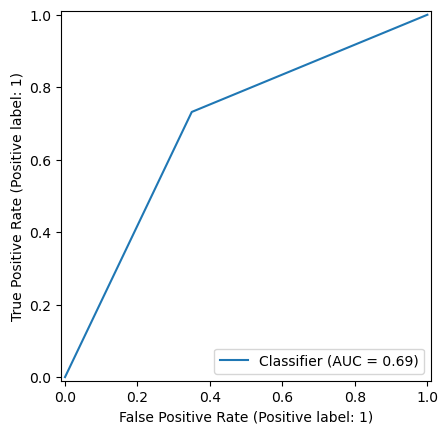

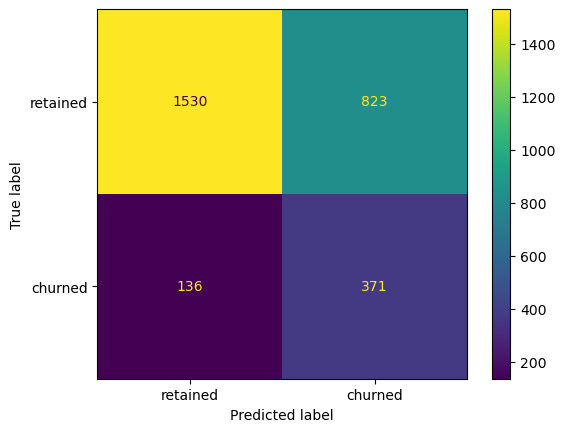

In [170]:
# Plot ROC and confusion matrix
roc_conf_matrix(y_val, y_pred)

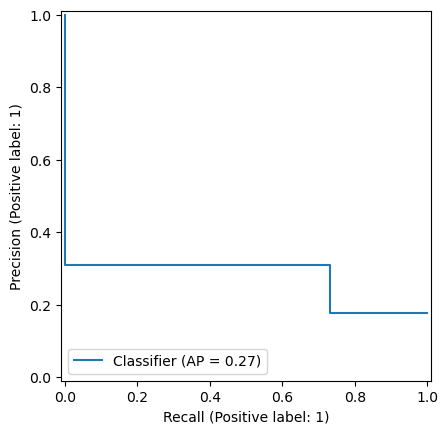

In [171]:
# Plot PR Curve
pr_plotter(y_val, y_pred)

### **Models with Resampling using SMOTE**

In [173]:
# Check initial class frequency
print(y_tr.value_counts())
print(x_tr.shape)

label
0    7057
1    1522
Name: count, dtype: int64
(8579, 9)


In [174]:
# Create balanced training dataset using SMOTE
# SMOTE stands for Synthetic Minority Oversampling Technique
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_tr_res, y_tr_res = sm.fit_resample(x_tr, y_tr)

In [175]:
# Check updated class frequency
print(y_tr_res.shape)
print(x_tr_res.shape)
print(y_tr_res.value_counts())

(14114,)
(14114, 9)
label
1    7057
0    7057
Name: count, dtype: int64


In [176]:
# Scale the resampled training data
std_scaler_res = StandardScaler()
std_scaler_res.fit(x_tr_res)
x_tr_res_scaled = std_scaler_res.transform(x_tr_res)

In [177]:
# Scale validation set using standard scaler
x_val_res_scaled = std_scaler_res.transform(x_val)

#### **A. Logistic Regression Model**

In [179]:
# Train logistic regression model
log_reg_res = LogisticRegression(penalty = None, max_iter = 400)
log_reg_res.fit(x_tr_res_scaled, y_tr_res)

LogisticRegression(max_iter=400, penalty=None)

In [180]:
# Predict on validation set
y_pred = predict_value(log_reg_res, x_val_res_scaled)

In [181]:
# Print scores
print_scores(y_val, y_pred, append = True)

Performance Scores
Precision:  0.3327
Recall: 0.7199
f1: 0.4551
Accuracy: 0.6944
ROC_AUC: 0.7044


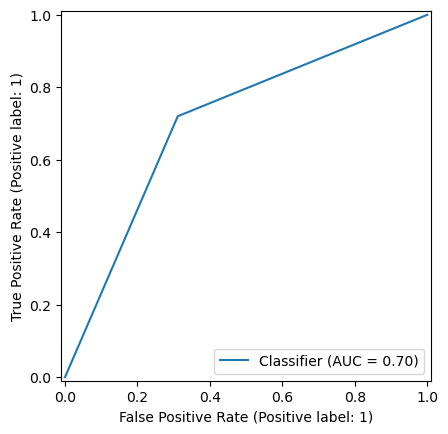

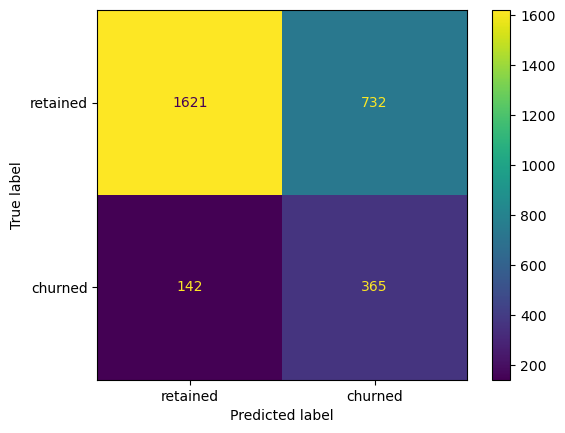

In [182]:
# Plot ROC and confusion matrix
roc_conf_matrix(y_val, y_pred)

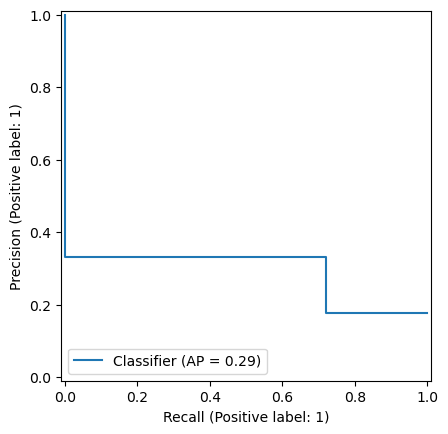

In [183]:
# Plot PR Curve
pr_plotter(y_val, y_pred)

#### **B. Naive Bayes Model**

In [185]:
# Train Naive Bayes model
gnb_res = GaussianNB()
gnb_res.fit(x_tr_res_scaled, y_tr_res)

GaussianNB()

In [186]:
# Predict on validation set
y_pred = predict_value(gnb_res, x_val_res_scaled)

In [187]:
# Print scores
print_scores(y_val, y_pred, append = True)

Performance Scores
Precision:  0.3192
Recall: 0.6371
f1: 0.4253
Accuracy: 0.6948
ROC_AUC: 0.6721


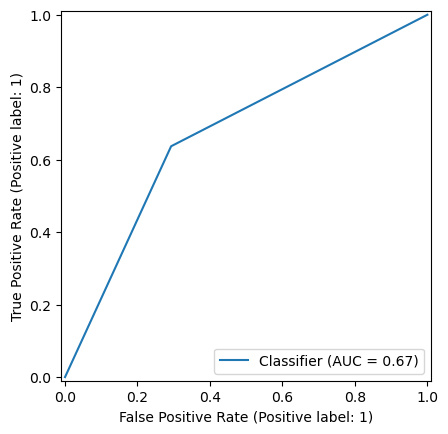

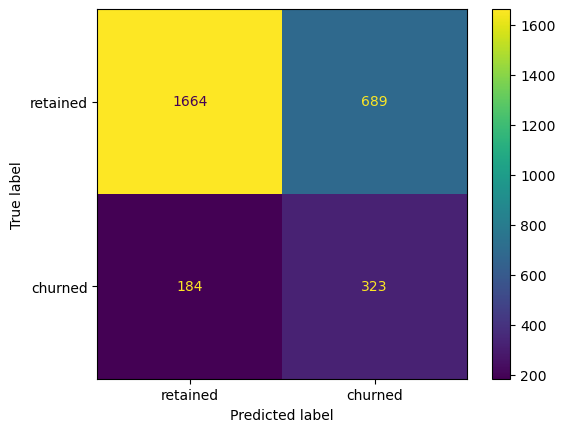

In [188]:
# Plot ROC and confusion matrix
roc_conf_matrix(y_val, y_pred)

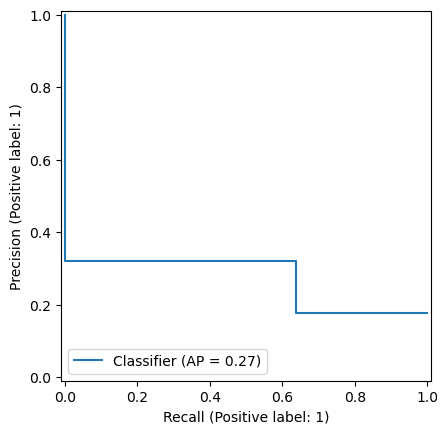

In [189]:
# Plot PR Curve
pr_plotter(y_val, y_pred)

#### **C. Random Forest Model**

In [191]:
%%time
# Train RF Model
rf_res = RandomForestClassifier(random_state = 0, max_depth = 4, n_estimators = 100)
rf_res.fit(x_tr_res_scaled, y_tr_res)

CPU times: total: 2.28 s
Wall time: 2.39 s


RandomForestClassifier(max_depth=4, random_state=0)

In [192]:
# Predict on validation set
y_pred = predict_value(rf_res, x_val_res_scaled)

In [193]:
# Print scores on validation set
print_scores(y_val, y_pred, append = True)

Performance Scores
Precision:  0.3048
Recall: 0.6746
f1: 0.4199
Accuracy: 0.6696
ROC_AUC: 0.6715


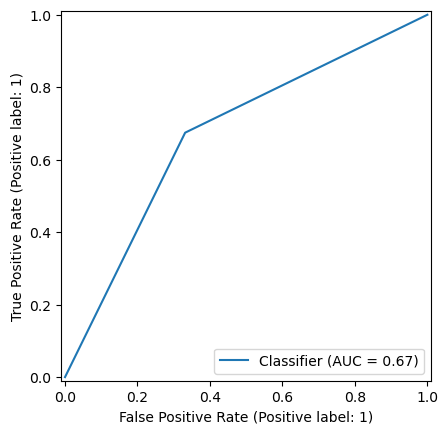

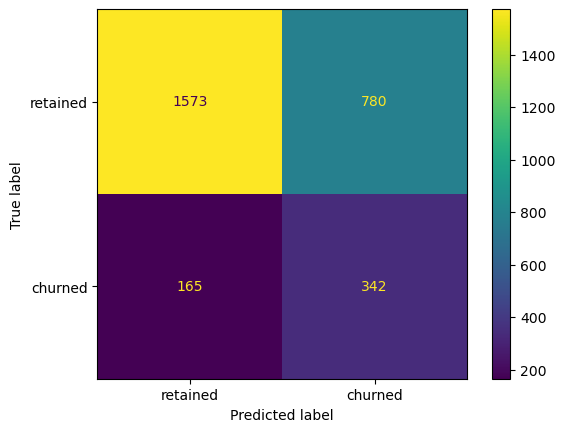

In [194]:
# Plot ROC and confusion matrix
roc_conf_matrix(y_val, y_pred)

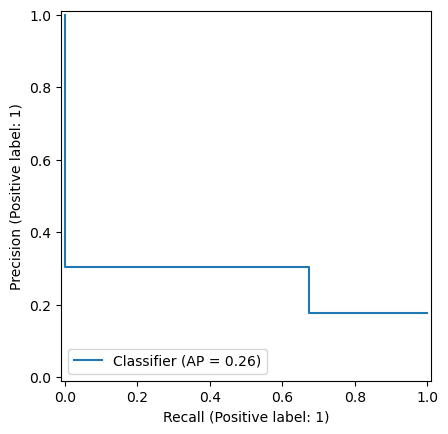

In [195]:
# Plot PR Curve
pr_plotter(y_val, y_pred)

#### **D. AdaBoost Model**

In [197]:
# Train adaboost model
decision_tree_res = DecisionTreeClassifier(random_state = 0, max_depth = 5)
adboost_res = AdaBoostClassifier(estimator = decision_tree_res, algorithm = 'SAMME')
adboost_res.fit(x_tr_res_scaled, y_tr_res)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=5,
                                                    random_state=0))

In [198]:
# Predict on validation set
y_pred = predict_value(adboost_res, x_val_res_scaled)

In [199]:
# Print scores on validation set
print_scores(y_val, y_pred, append = True)

Performance Scores
Precision:  0.3093
Recall: 0.5069
f1: 0.3842
Accuracy: 0.7119
ROC_AUC: 0.6315


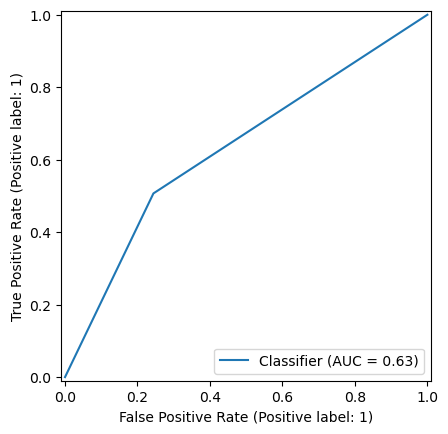

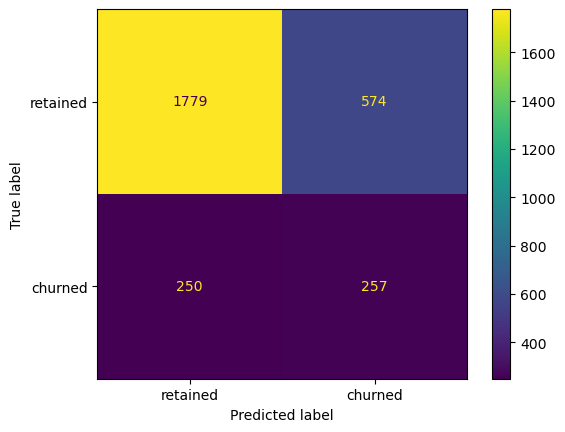

In [200]:
# Plot ROC and confusion matrix
roc_conf_matrix(y_val, y_pred)

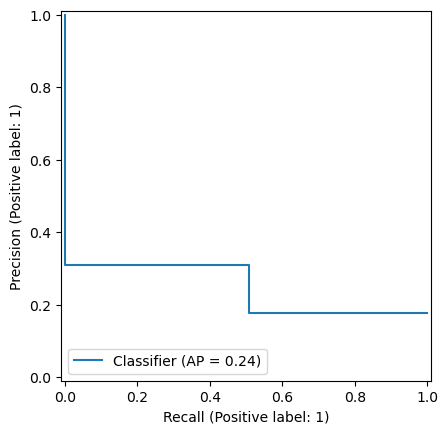

In [201]:
# Plot PR Curve
pr_plotter(y_val, y_pred)

#### **E. XGBoost Model**

In [203]:
# Train XGBoost model
xgb_res = XGBClassifier(random_state = 0, objective = 'binary:logistic')
xgb_res.fit(x_tr_res_scaled, y_tr_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [204]:
# Predict on validation set
y_pred = predict_value(xgb_res, x_val_res_scaled)

In [205]:
# Print scores on validation set
print_scores(y_val, y_pred, append = True)

Performance Scores
Precision:  0.3121
Recall: 0.426
f1: 0.3603
Accuracy: 0.7318
ROC_AUC: 0.6119


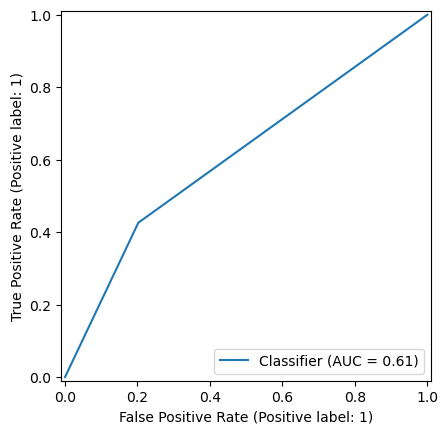

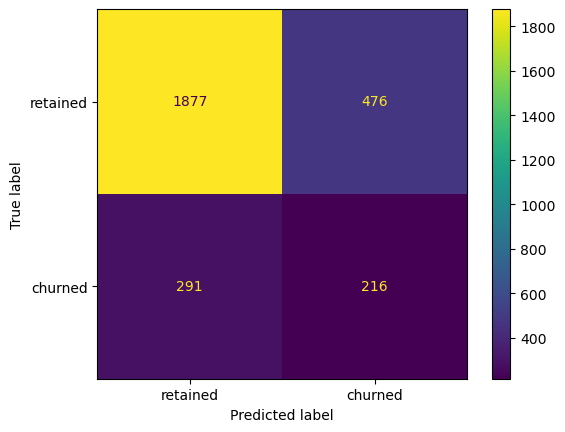

In [206]:
# Plot ROC and confusion matrix
roc_conf_matrix(y_val, y_pred)

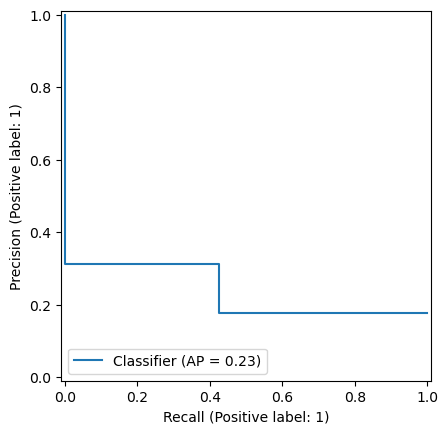

In [207]:
# Plot PR Curve
pr_plotter(y_val, y_pred)

#### **F. Support Vector Machine**

In [209]:
# Train SVM
svm_res = SVC(random_state = 0, kernel = 'linear', probability = True)
svm_res.fit(x_tr_res_scaled, y_tr_res)

SVC(kernel='linear', probability=True, random_state=0)

In [210]:
# Predict on validation set
y_pred = predict_value(svm_res, x_val_res_scaled)

In [211]:
# Print scores on validation set
print_scores(y_val, y_pred, append = True)

Performance Scores
Precision:  0.3174
Recall: 0.7456
f1: 0.4452
Accuracy: 0.6706
ROC_AUC: 0.7


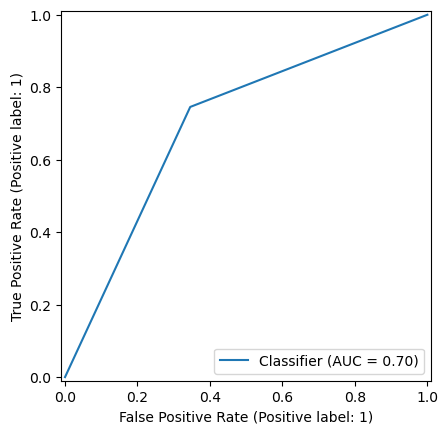

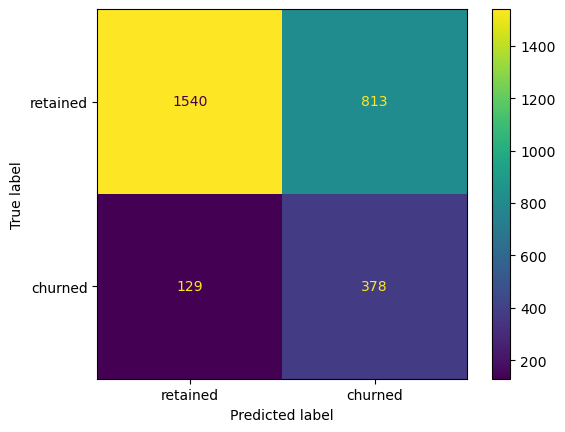

In [212]:
# Plot ROC and confusion matrix
roc_conf_matrix(y_val, y_pred)

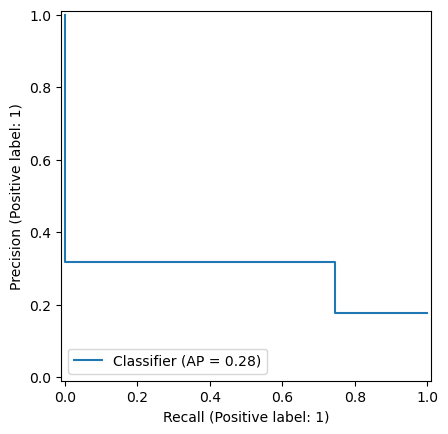

In [213]:
# Plot PR Curve
pr_plotter(y_val, y_pred)

## **2.4. PACE: Execute**

This stage involves two tasks:
1. Assess and select the top-performing model.
2. Apply the best model to make predictions on the test data.

### **2.4.1. Results**

**Note -** In the table below:
* CW - Model uses class weights
* SMOTE - Model uses resampling using SMOTE

In [217]:
# Consolidated results

results_overall = pd.DataFrame({'Model Name': ['Baseline','Logistic Regression (CW)', 'Naive Bayes', 'Random Forest (CW)', 'AdaBoost (CW)', 'XGBoost (CW)', 'Support Vector Machine (CW)','Logistic Regression (SMOTE)', 'Naive Bayes (SMOTE)', 'Random Forest (SMOTE)', 'AdaBoost (SMOTE)', 'XGBoost (SMOTE)', 'Support Vector Machine (SMOTE)'],
                                'Precision': precision_list,
                                'Recall': recall_list,
                                'f1': f1_list,
                                'Accuracy': accuracy_list,
                                'ROC_AUC': roc_auc_list
                               })
results_overall = results_overall.sort_values(by = 'Recall', ascending = False).reset_index(drop = True)
results_overall.to_csv('results.csv')
results_overall


,Model Name,Precision,Recall,f1,Accuracy,ROC_AUC
0,Support Vector Machine (SMOTE),0.3174,0.7456,0.4452,0.6706,0.7000
1,Support Vector Machine (CW),0.3107,0.7318,0.4362,0.6647,0.6910
2,Logistic Regression (CW),0.3222,0.7199,0.4451,0.6818,0.6968
3,Logistic Regression (SMOTE),0.3327,0.7199,0.4551,0.6944,0.7044
4,Random Forest (CW),0.3072,0.6943,0.4259,0.6682,0.6784
5,AdaBoost (CW),0.3265,0.6923,0.4437,0.6923,0.6923
6,XGBoost (CW),0.3219,0.6844,0.4379,0.6885,0.6869
7,Random Forest (SMOTE),0.3048,0.6746,0.4199,0.6696,0.6715
8,Naive Bayes (SMOTE),0.3192,0.6371,0.4253,0.6948,0.6721
9,AdaBoost (SMOTE),0.3093,0.5069,0.3842,0.7119,0.6315


The Support Vector Machine using SMOTE achieves the highest recall, while Logistic Regression demonstrates the highest precision score.
The low perfomance of the Naive Bayes model is understandable in this case, as it does not support class weights.

The results suggest that resampling with SMOTE tends to cause overfitting in tree-based models, in contrast to assigning class weights.
This is because SMOTE can amplify noise, increase data complexity, and lead to overfitting particularly in tree-based models that are already prone to memorizing data. Class weights, on the other hand, allow the model to focus on the minority class without changing the data distribution, thus reducing the risk of overfitting.

To decide which model to use for predicting on test data, it's important to consider multiple evaluation metrics, as they each provide different insights into model performance.

If the goal is to minimize false negatives (missing churned customers), SVM will be the best model due to its higher recall, though at the cost of more false positives.

If the goal is to balance false positives and false negatives and achieve a slightly higher accuracy, then Logistic Regression would be a good option.

### **2.4.2. Performance on Test Data**

In [231]:
# Scale test data
x_test_scaled = std_scaler_res.transform(x_test)

In [232]:
# Predict using SVM trained on resampled data
y_pred = predict_value(svm_res, x_test_scaled)

In [233]:
# Print scores
print_scores(y_test, y_pred, append = False)

Performance Scores
Precision:  0.3019
Recall: 0.7081
f1: 0.4233
Accuracy: 0.658
ROC_AUC: 0.6777


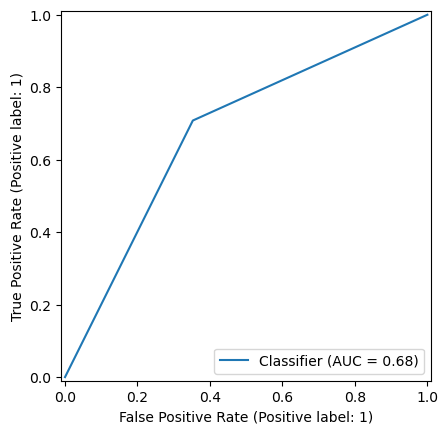

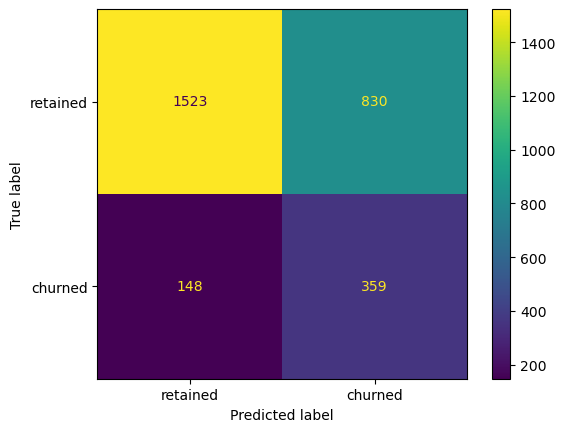

In [234]:
# Plot ROC and confusion matrix
roc_conf_matrix(y_test, y_pred)

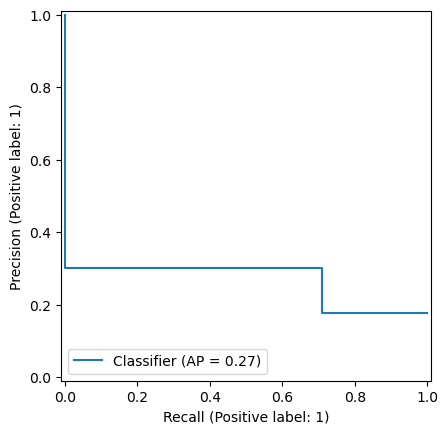

In [235]:
# Plot PR Curve
pr_plotter(y_test, y_pred)

Text(0.5, 1.0, 'Feature Importance')

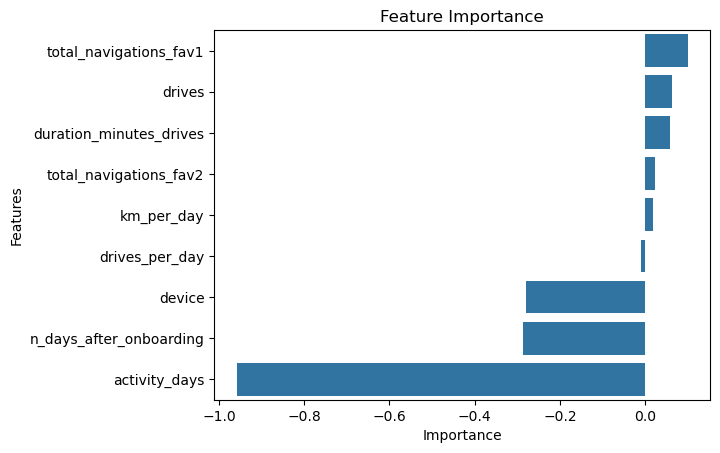

In [236]:
# Plot feature importance
feat_imp = pd.DataFrame({"Features": features_list, "Importance": svm_res.coef_[0]}).sort_values(by = "Importance", ascending = False)
feat_imp.sort_values(by = "Importance", ascending = False)
sns.barplot(data = feat_imp, x="Importance", y="Features")
plt.title("Feature Importance")

### Performance of Baseline Model on Test Data

In [238]:
# Predict using Baseline Model
y_pred = predict_value(log_reg_bl, x_test_scaled)

In [239]:
# Print scores
print_scores(y_test, y_pred, append = False)

Performance Scores
Precision:  0.5484
Recall: 0.0335
f1: 0.0632
Accuracy: 0.8238
ROC_AUC: 0.5138


## **2.5. Conclusion**

Based on the EDA, we observed that customers with higher activity days and longer app usage tend to have lower likelihood of churning. In contrast, customers who engage in more frequent and longer drives per month are more likely to churn. This behavior suggests that their churn may stem from unmet needs within the Waze app, which doesn't fully cater to their specific requirements.

The churn prediction model, built using Support Vector Machine (SVM), achieves **0.71 recall**, **0.30 precision**, **0.42 f1**, **0.66 accuracy** and **0.68 ROC-AUC** scores. This represents **24x** improvement in recall compared to the baseline logistic regression model, which achieved only **0.03 recall**. These results indicate that the model is relatively effective in identifying customers likely to churn, but there is room for improvement, especially in terms of precision.

By targeting customers flagged as high-risk for churn, we can focus on improving the user experience and addressing their specific needs, particularly those related to driving behavior and app functionality.